## Introduction

In this project, I conducted Time Series Forecasting and Exploratory Data Analysis (EDA) on monthly gold prices dataset. The objective was to analyze historical gold prices and make forecasts for future trends.

In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/acamillemartin/working_datasets/main/gold_monthly.csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
# Dataset Exploration
df.shape

(847, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


## Exploratory Data Analysis

In [5]:
print(f"Date range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from - 1950-01 to 2020-07


In [6]:
## Change the datatype
date = pd.date_range(start='1/1/1950', end='8/1/2020', freq="M")
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [7]:
## Set Date column as index
df['month'] = date
df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


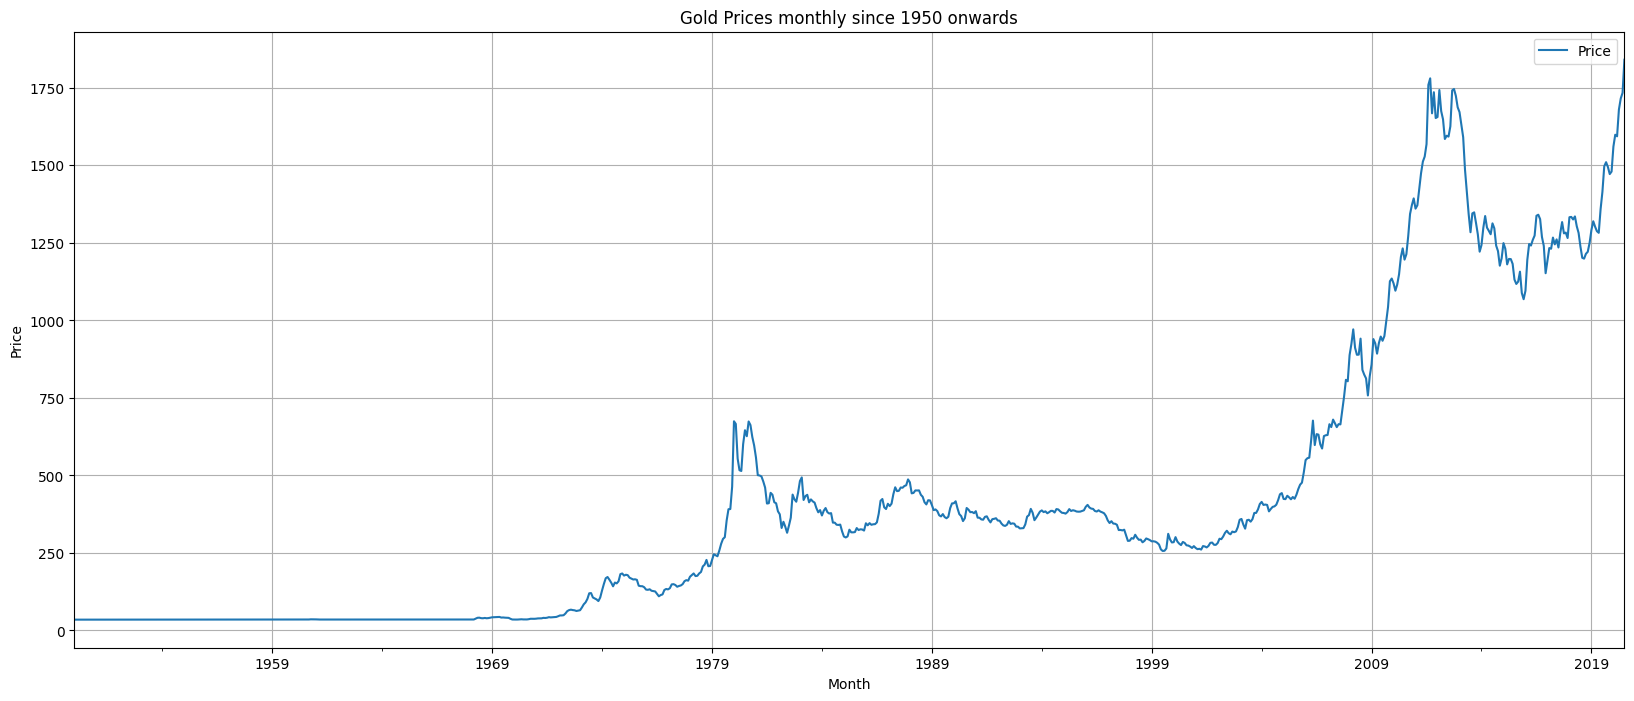

In [8]:
## Visualize data
df.plot(figsize=(20,8))
plt.title('Gold Prices monthly since 1950 onwards')
plt.xlabel("Month")
plt.ylabel('Price')
plt.grid()
plt.show()

In [9]:
# Descriptive Statistics
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


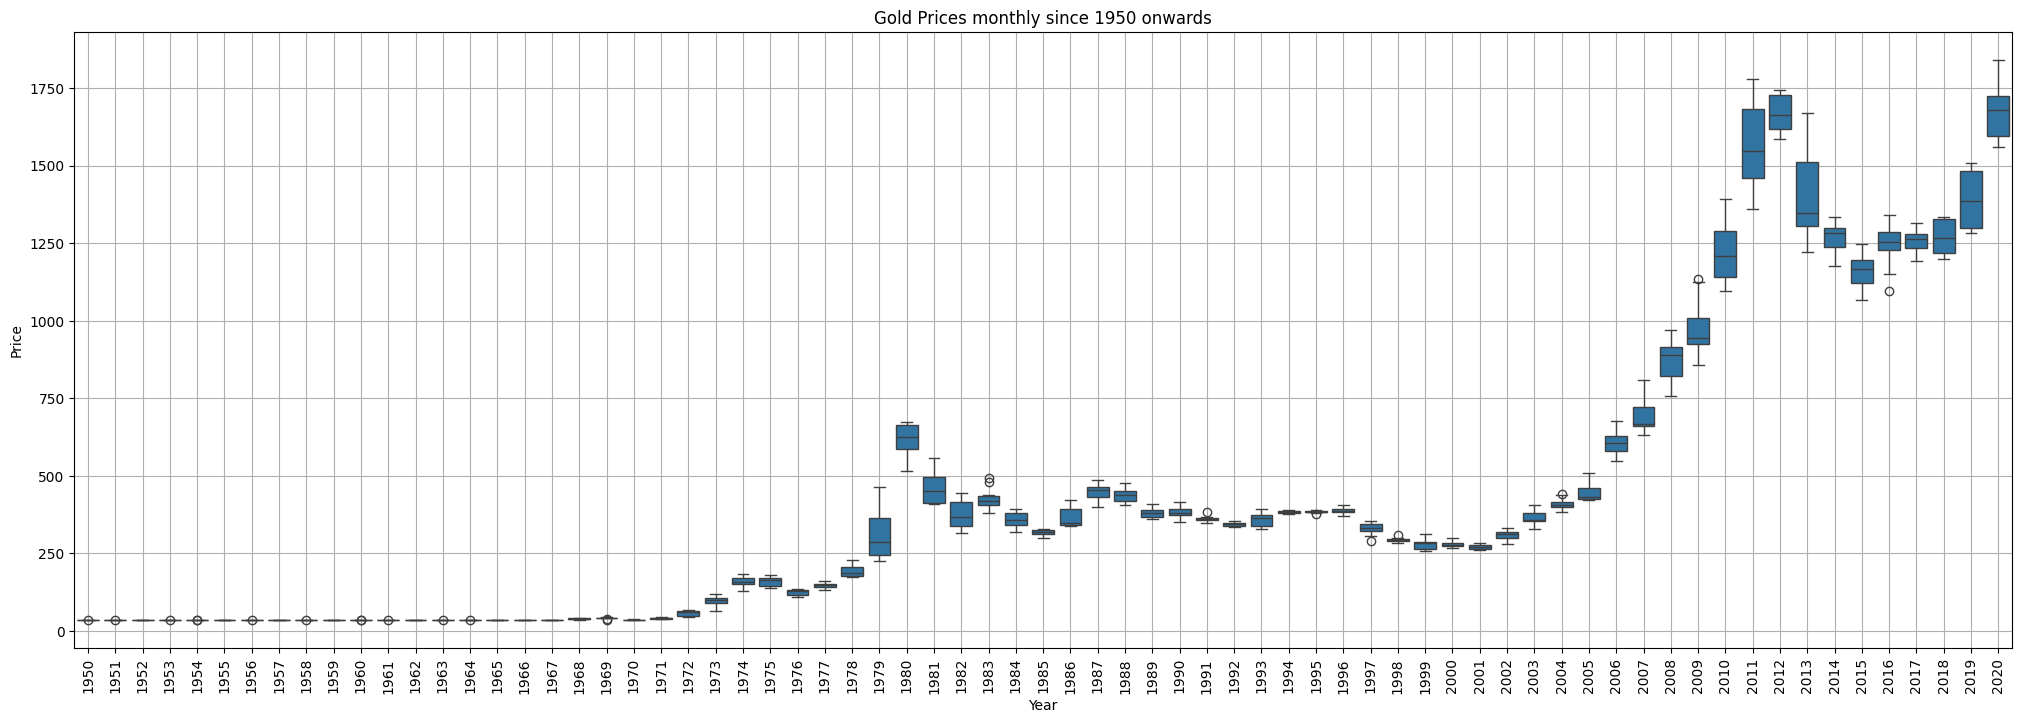

In [10]:
# Boxplot
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year, y = df.values[:,0], ax=ax)
plt.title('Gold Prices monthly since 1950 onwards')
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.grid()

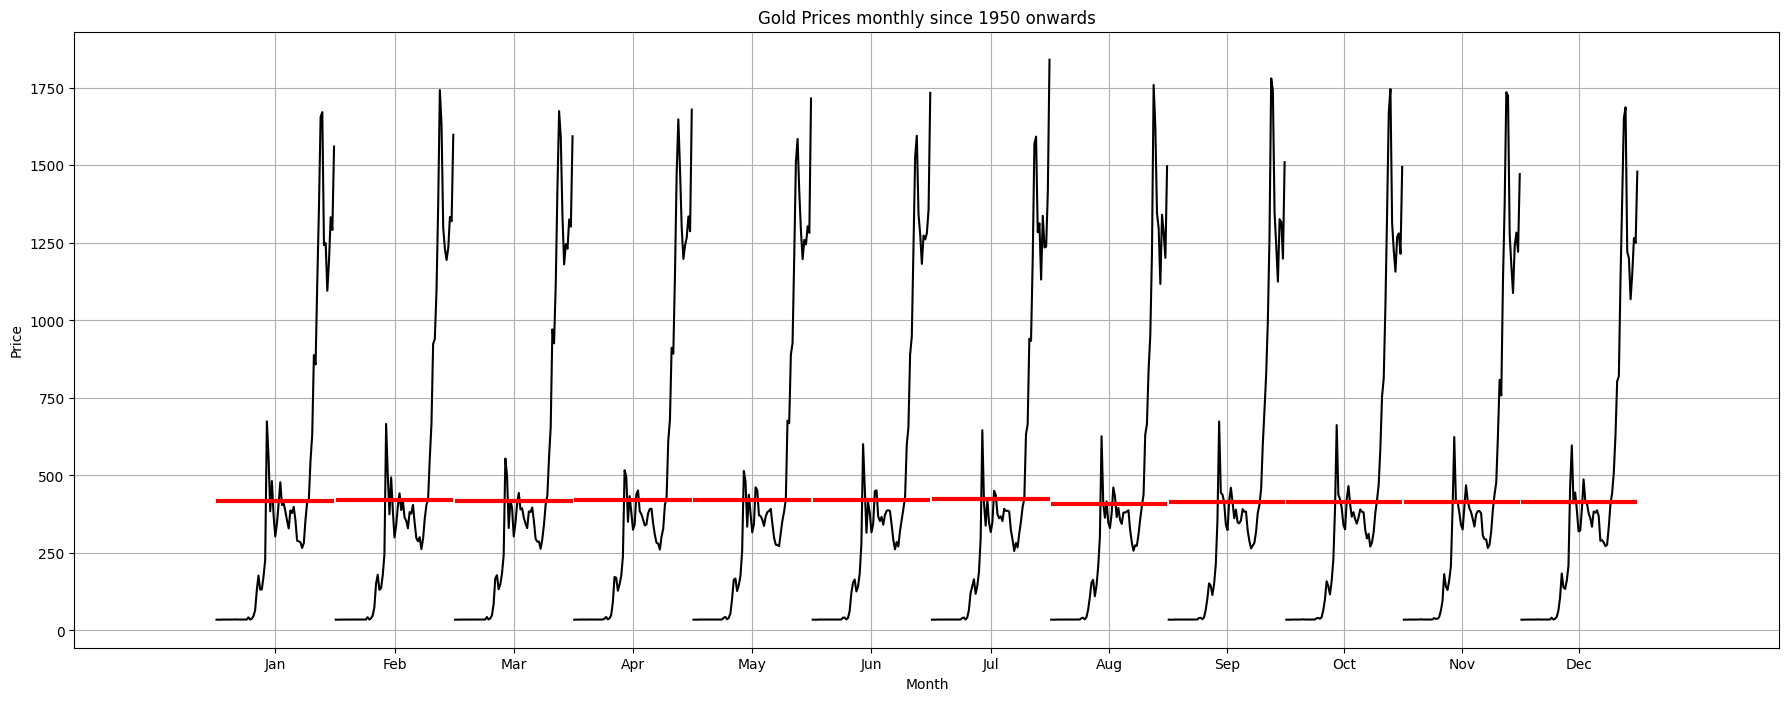

In [11]:
# Month Plot
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel = 'gold price', ax=ax)
plt.title('Gold Prices monthly since 1950 onwards')
plt.xlabel("Month")
plt.ylabel('Price')
plt.grid()

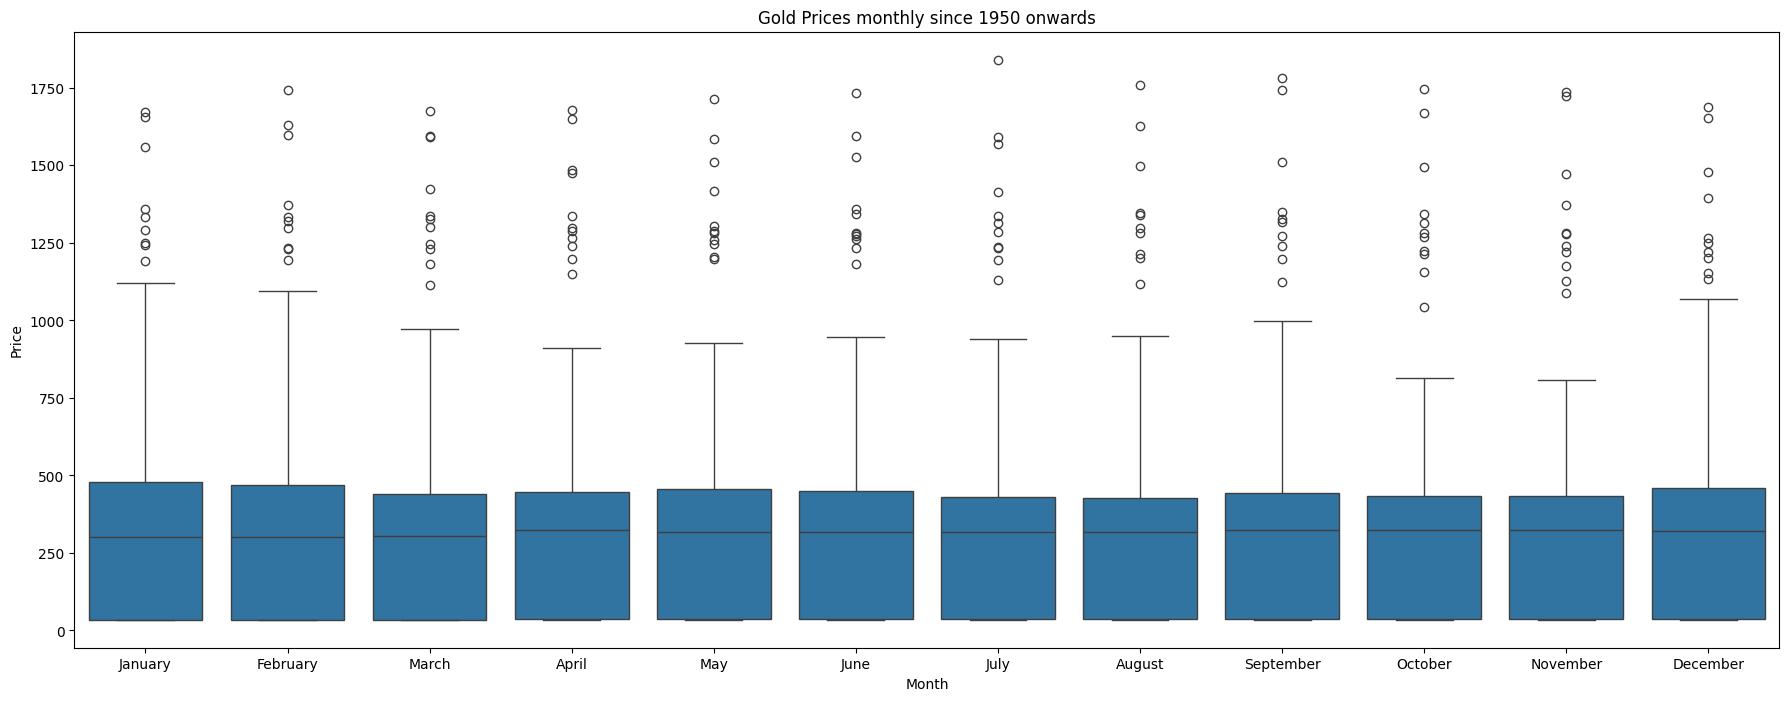

In [12]:
# Boxplot of Prices per month
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(), y = df.values[:,0], ax=ax)
plt.title('Gold Prices monthly since 1950 onwards')
plt.xlabel("Month")
plt.ylabel('Price')
plt.show()

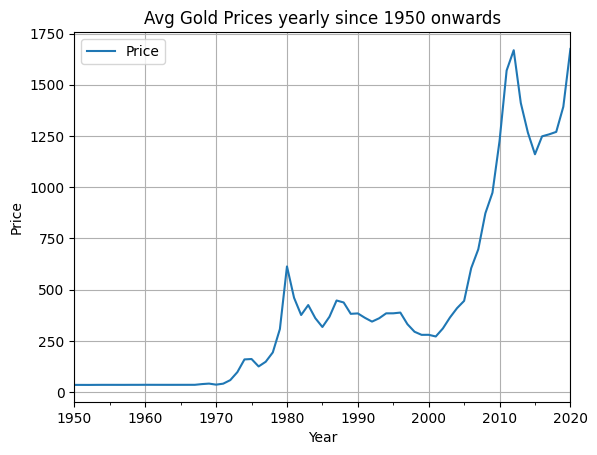

In [13]:
# Linegraph Prices Yearly
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Avg Gold Prices yearly since 1950 onwards')
plt.xlabel("Year")
plt.ylabel('Price')
plt.grid()

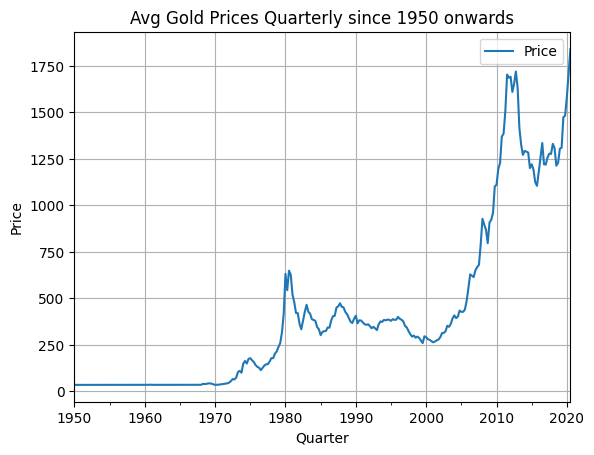

In [14]:
# Linegraph Prices Quarterly
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('Avg Gold Prices Quarterly since 1950 onwards')
plt.xlabel("Quarter")
plt.ylabel('Price')
plt.grid()

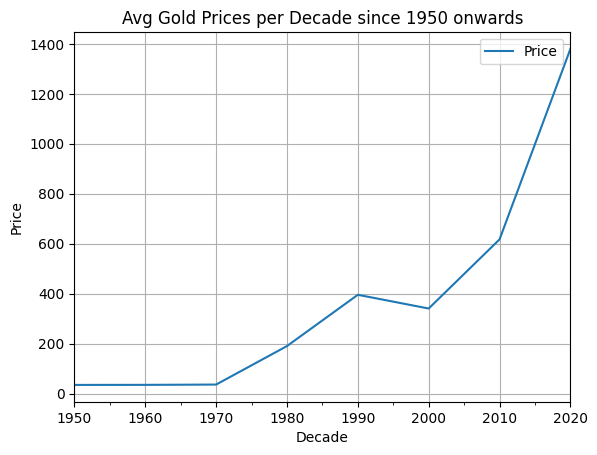

In [15]:
# Linegraph Prices on Decade
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('Avg Gold Prices per Decade since 1950 onwards')
plt.xlabel("Decade")
plt.ylabel('Price')
plt.grid()

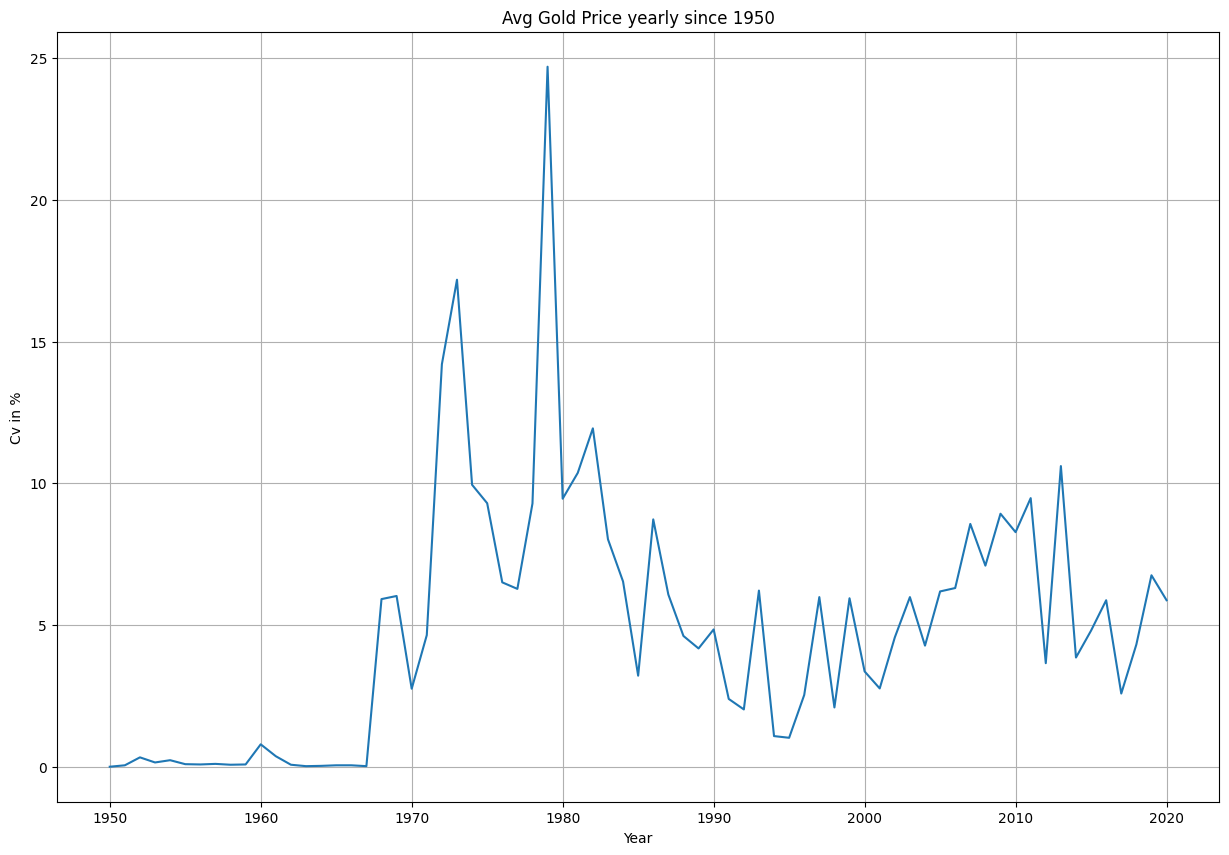

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot();

plt.title('Avg Gold Price yearly since 1950')
plt.xlabel("Year")
plt.ylabel('Cv in %')
plt.grid()

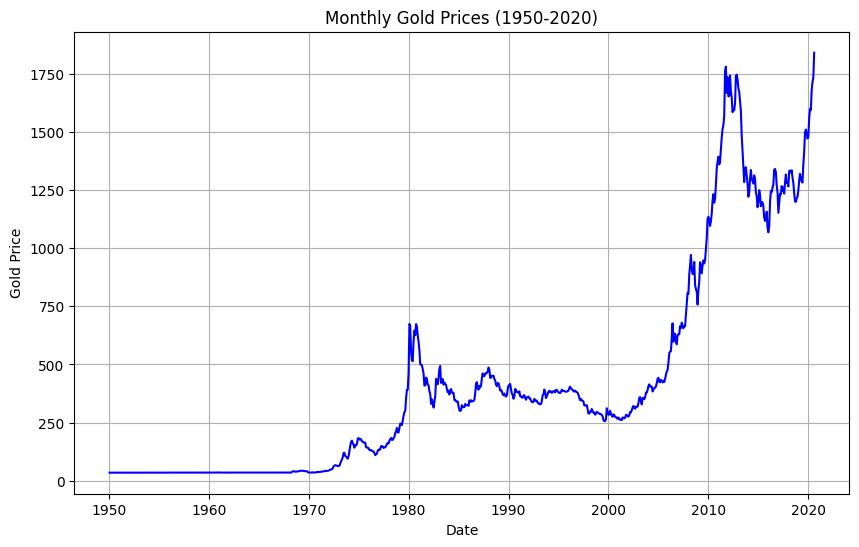

In [18]:
# Additional Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], color='blue')
plt.title('Monthly Gold Prices (1950-2020)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.grid(True)
plt.show()

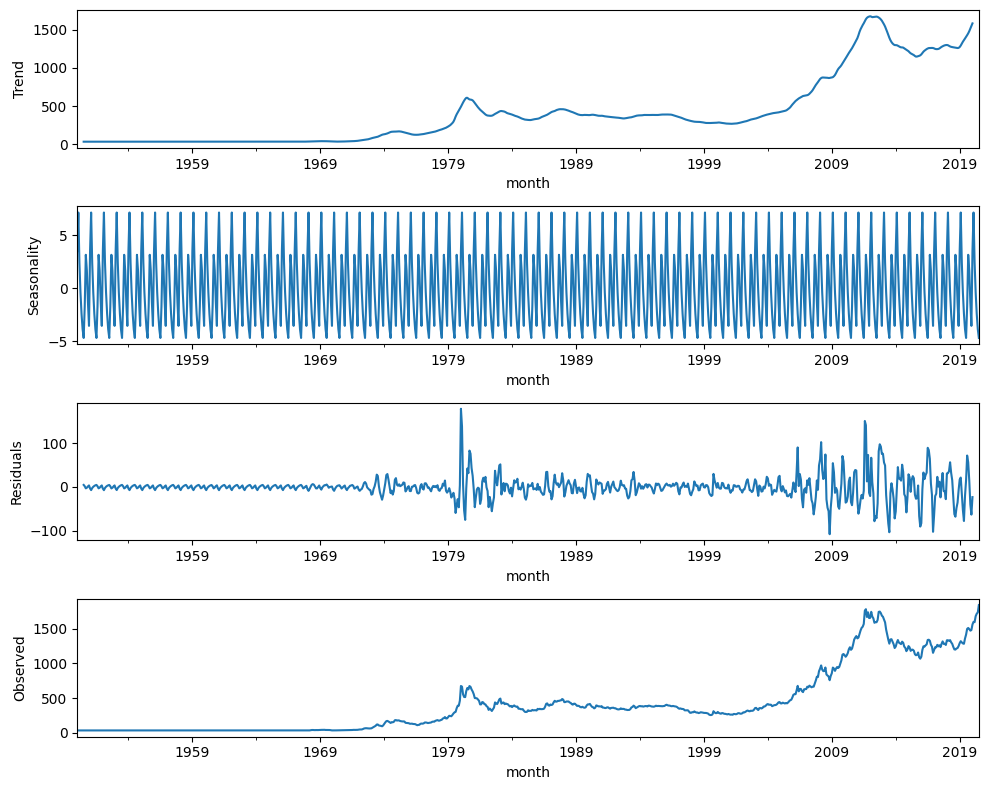

In [19]:
# 3. Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Price'], model='additive', period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
decomposition.trend.plot(ax=ax1)
ax1.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_ylabel('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_ylabel('Residuals')
decomposition.observed.plot(ax=ax4)
ax4.set_ylabel('Observed')
plt.tight_layout()
plt.show()

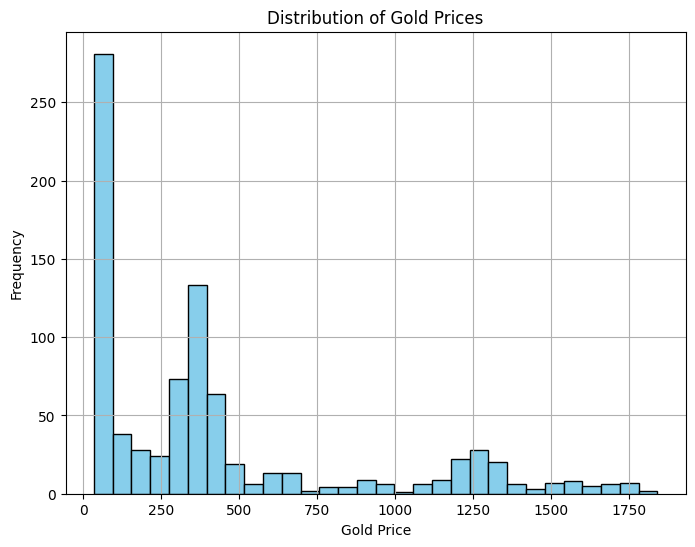

In [20]:
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Gold Prices')
plt.xlabel('Gold Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


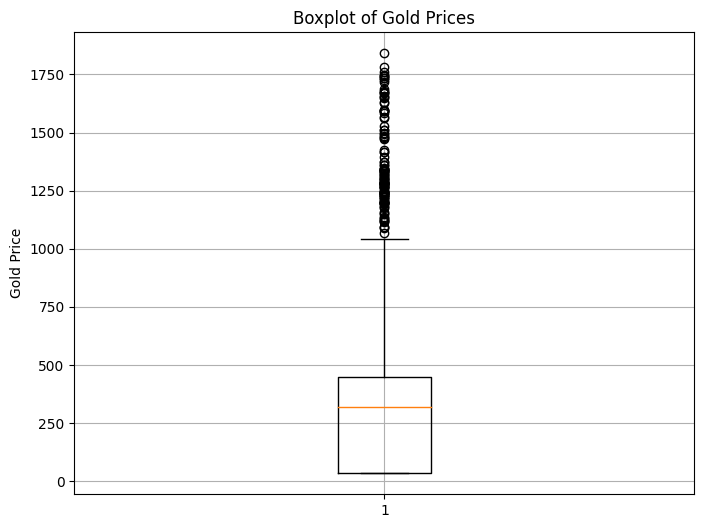

In [21]:
# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Price'])
plt.title('Boxplot of Gold Prices')
plt.ylabel('Gold Price')
plt.grid(True)
plt.show()

In [16]:
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


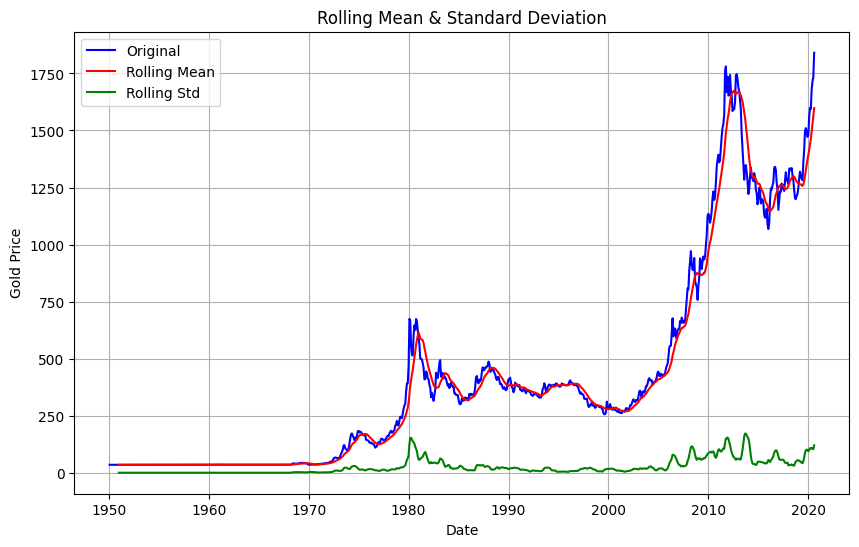

In [22]:
# Rolling Statistics
rolling_mean = df['Price'].rolling(window=12).mean()
rolling_std = df['Price'].rolling(window=12).std()


plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Original', color='blue')
plt.plot(df.index, rolling_mean, label='Rolling Mean', color='red')
plt.plot(df.index, rolling_std, label='Rolling Std', color='green')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.show()

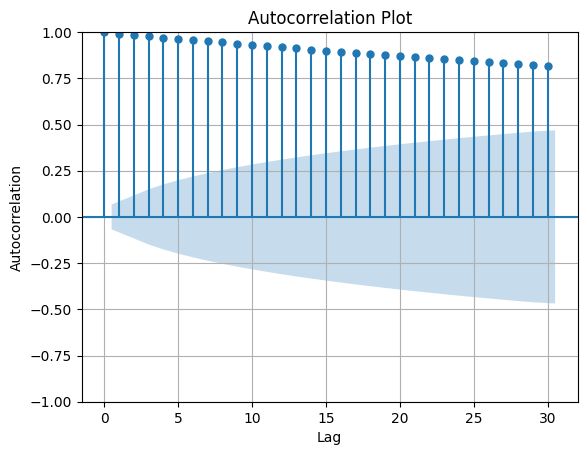

In [23]:
# Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Price'], lags=30)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

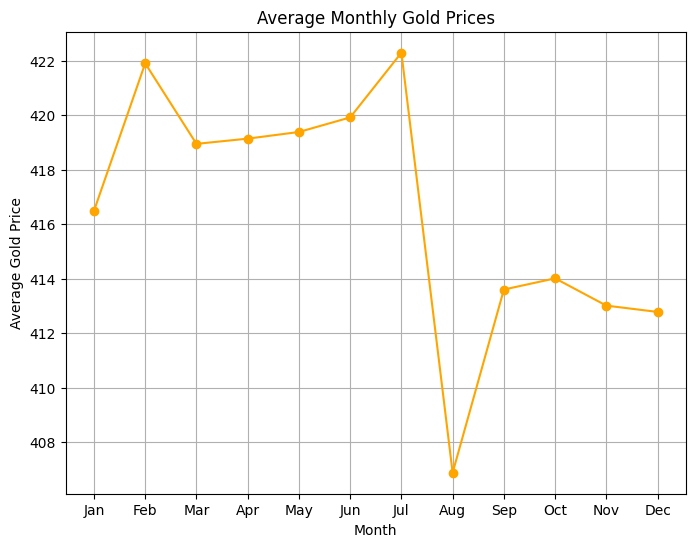

In [24]:
# Seasonal Plot
monthly_average = df.groupby(df.index.month).mean()

plt.figure(figsize=(8, 6))
plt.plot(monthly_average.index, monthly_average['Price'], marker='o', color='orange')
plt.title('Average Monthly Gold Prices')
plt.xlabel('Month')
plt.ylabel('Average Gold Price')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## Time Series Forecasting

In [48]:
## Train-test Split
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


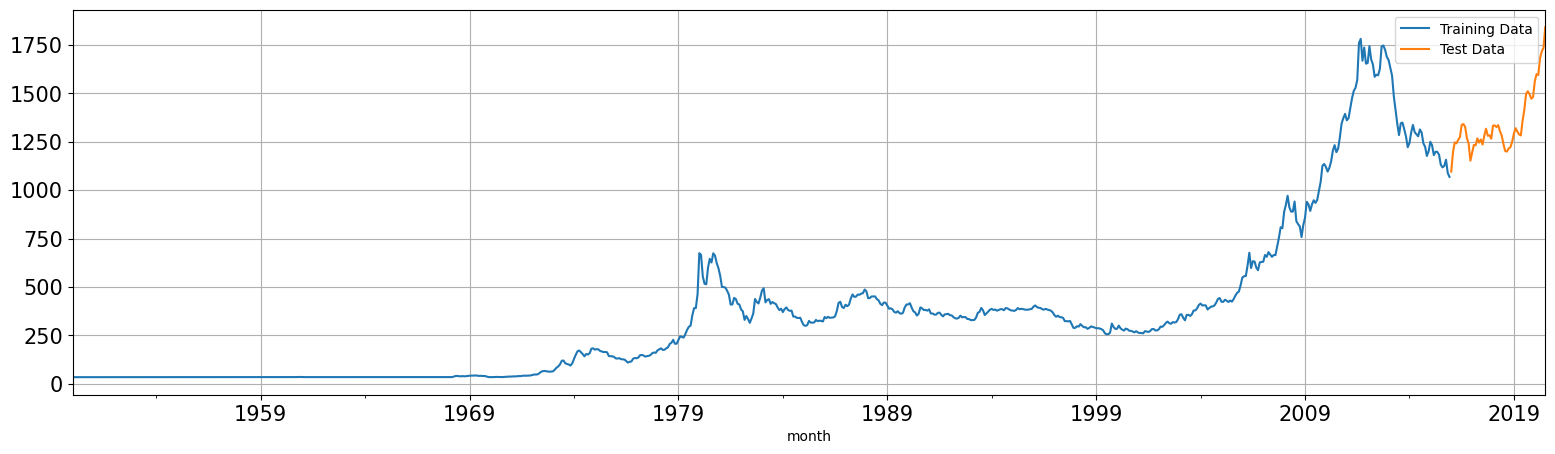

In [27]:
## Visualize Train and Test Data
train['Price'].plot(figsize=(19,5), fontsize = 15)
test['Price'].plot(figsize=(19,5), fontsize = 15)

plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

### Linear Regression

In [49]:
# Prepare data for Linear Regression
train_time = [i + 1 for i in range(len(train))]
test_time = [i + len(train) + 1 for i in range(len(test))]
print(len(train_time), len(test_time))

792 55


In [51]:
LR_train = train.copy()
LR_test = test.copy()

LR_train['time'] = train_time
LR_test['time'] = test_time

# Fit Linear Regression model
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

LinearRegression()

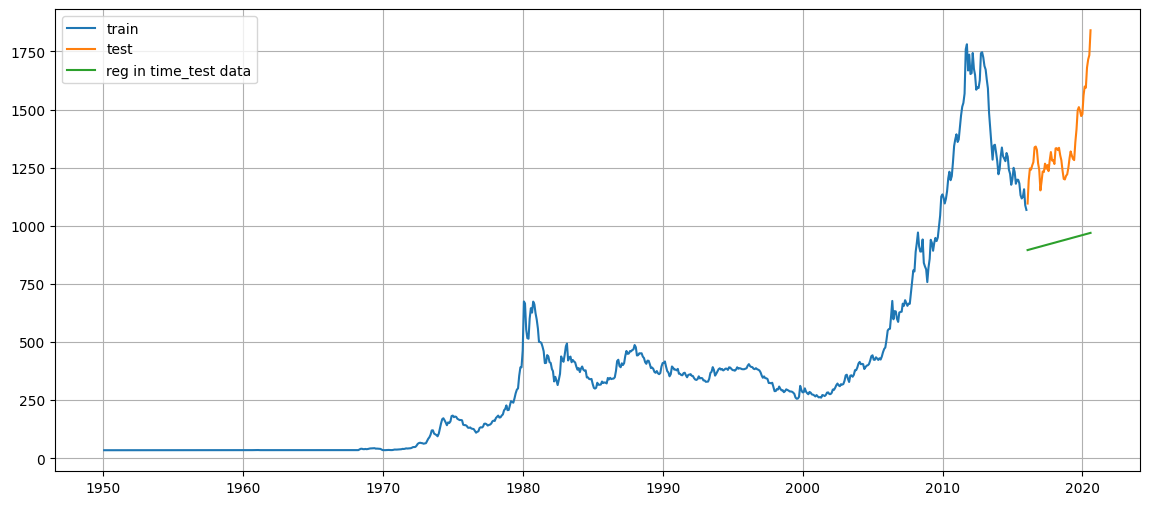

In [32]:
# Make predictions
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

# Plot predictions and actual values
plt.figure(figsize = (14,6))
plt.plot(train['Price'], label = 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(LR_test['forecast'], label = 'reg in time_test data')
plt.legend(loc= 'best')
plt.grid()

In [52]:
# Calculate MAPE for Linear Regression
def mape(actual, pred):
  return round((np.mean(abs(actual - pred)/ actual)) * 100, 2)

  mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print("MAPE us %3.3f"%(mape_model1_test),"%")

MAPE us 29.760 %


In [35]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index=['RegressionOnTime'])
results

,Test Mape (%)
RegressionOnTime,29.76


### Naive Forecast

In [55]:
# Prepare data for Naive Forecast
Naive_train = train.copy()
Naive_test = test.copy()

Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

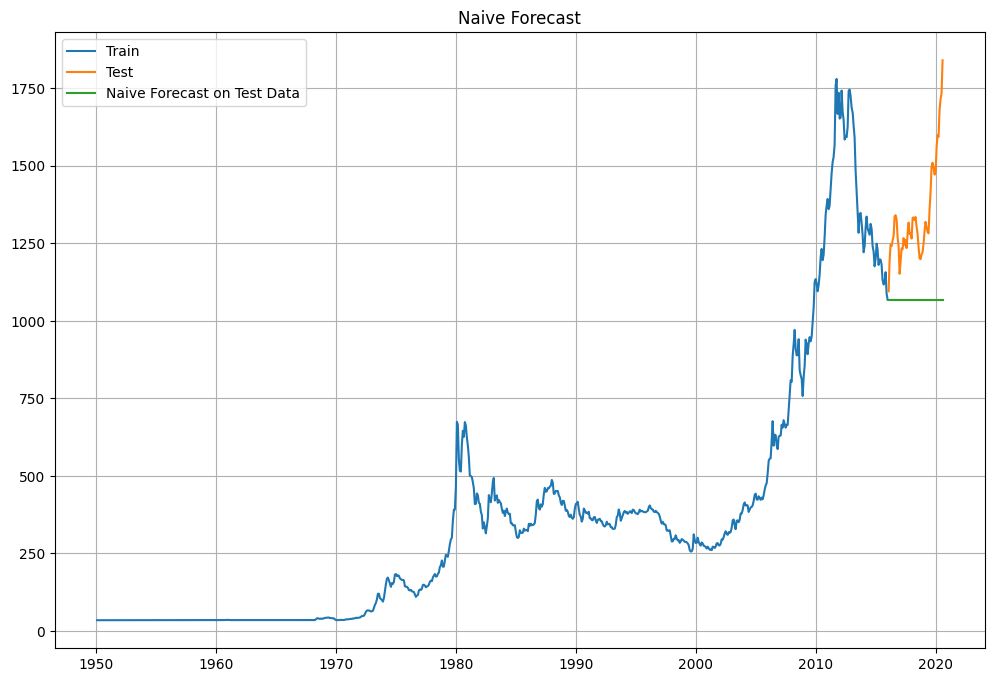

In [56]:
# Plot Naive Forecast
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')

plt.plot(Naive_test['naive'], label = 'Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid()

In [39]:
# Calculate MAPE for Naive Forecast
mape_model2_test = mape(test['Price'].values, Naive_test['naive'].values)
print("For Naive Forecast on the Test Data, MAPE us %3.3f" %(mape_model2_test),"%")

For Naive Forecast on the Test Data, MAPE us 19.380 %


In [40]:
results2 = pd.DataFrame({'Test Mape (%)': [mape_model2_test]}, index=['NaiveModel'])
results = pd.concat([results, results2])
results

,Test Mape (%)
RegressionOnTime,29.76
NaiveModel,19.38


### Exponential Smoothing Model

In [41]:
# Fit Exponential Smoothing model
final_model = ExponentialSmoothing(df,
                                   trend='additive',
                                   seasonal='additive').fit(smoothing_level=0.4,
                                                           smoothing_trend=0.3,
                                                           smoothing_seasonal=0.6)

In [42]:
# Calculate MAPE for Exponential Smoothing model
MAPE_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE", MAPE_final_model)

MAPE 17.24


In [44]:
# Forecast using Exponential Smoothing model
predictions = final_model.forecast(steps=len(test))
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96*np.std(final_model.resid,ddof=1),
                        'prediction':predictions,
                        'upper_CI': predictions + 1.96 * np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


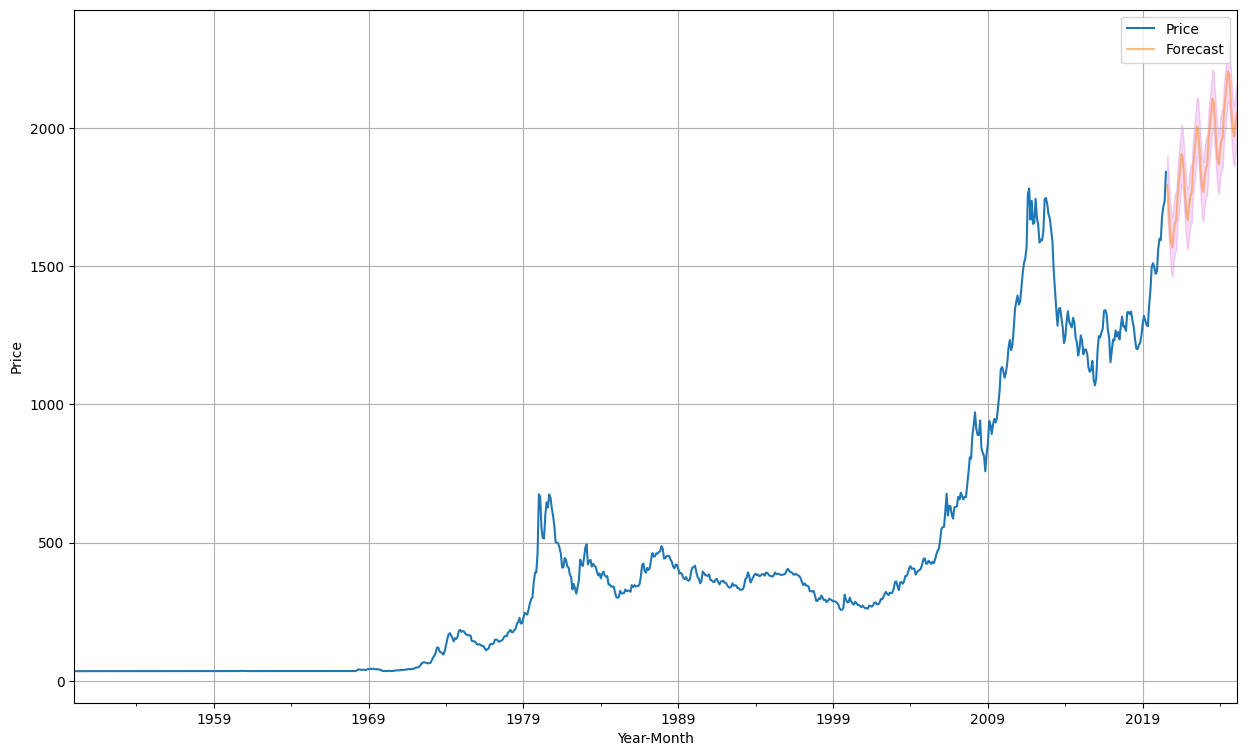

In [45]:
# Plot actual values and forecast
axis = df.plot(label ='Actual', figsize=(15,9))
pred_df['prediction'].plot(ax=axis, label ='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color ='m', alpha=.15)
axis.set_xlabel("Year-Month")
axis.set_ylabel("Price")
plt.legend(loc='best')
plt.grid()
plt.show()